<a href="https://colab.research.google.com/github/zephyrstorm123/MO-IT134-MachineLearning/blob/03112025-ARIMA/Milestone_2_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MACHINE LEARNING AND PREDICTIVE ANALYTICS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Setting Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Exploratory Procedures of Data

In [ ]:
transactions_df = pd.read_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/transactions_data.csv')
products_df = pd.read_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/products_data.csv')
customer_df = pd.read_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/customers_data.csv')

In [ ]:
transactions_df

,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
0,0.0,1.0,88.0,6.0,NaN,2024/03/26,194379.147964,1075200.0
1,1.0,2.0,29.0,19.0,16.0,"July 09, 2024",97930.993380,1428000.0
2,2.0,NaN,28.0,18.0,6.0,04/13/2024,126095.547778,940800.0
3,3.0,4.0,85.0,12.0,12.0,09-06-2023,NaN,1008000.0
4,4.0,5.0,47.0,3.0,8.0,07/06/2021,99575.609634,705600.0
...,...,...,...,...,...,...,...,...
9995,9995.0,NaN,NaN,10.0,NaN,"June 05, 2022",NaN,627200.0
9996,9996.0,9997.0,39.0,2.0,9.0,2021/05/17,159518.597391,1512000.0
9997,9997.0,NaN,90.0,1.0,15.0,"July 19, 2022",128137.094759,1960000.0
9998,9998.0,9999.0,33.0,NaN,19.0,2021/04/15,81786.119894,1680000.0


In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9000 non-null   float64
 1   Transaction_ID    9000 non-null   float64
 2   Company_ID        9000 non-null   float64
 3   Product_ID        9000 non-null   float64
 4   Quantity          9000 non-null   float64
 5   Transaction_Date  10000 non-null  object 
 6   Product_Price     9000 non-null   float64
 7   Total_Cost        9000 non-null   float64
dtypes: float64(7), object(1)
memory usage: 625.1+ KB


###Checking/Filling Up Missing Data

In [ ]:
#Filling Up Missing Transaction ID
#Transaction ID seems to be just the index of the data +1. So we fill up the missing data using that information

transactions_df['Transaction_ID'] = transactions_df.index + 1

In [ ]:
transactions_df

,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
0,0.0,1.0,88.0,6.0,NaN,2024/03/26,194379.147964,1075200.0
1,1.0,2.0,29.0,19.0,16.0,"July 09, 2024",97930.993380,1428000.0
2,2.0,NaN,28.0,18.0,6.0,04/13/2024,126095.547778,940800.0
3,3.0,4.0,85.0,12.0,12.0,09-06-2023,NaN,1008000.0
4,4.0,5.0,47.0,3.0,8.0,07/06/2021,99575.609634,705600.0
...,...,...,...,...,...,...,...,...
9995,9995.0,NaN,NaN,10.0,NaN,"June 05, 2022",NaN,627200.0
9996,9996.0,9997.0,39.0,2.0,9.0,2021/05/17,159518.597391,1512000.0
9997,9997.0,NaN,90.0,1.0,15.0,"July 19, 2022",128137.094759,1960000.0
9998,9998.0,9999.0,33.0,NaN,19.0,2021/04/15,81786.119894,1680000.0


In [ ]:
#Filling Up Missing Values of Quantity, Product_Price and Total_Cost

def fill_missing_values(row):
    # Check if Total_Cost is missing but not Quantity and Product_Price
    if pd.isnull(row['Total_Cost']) and not pd.isnull(row['Quantity']) and not pd.isnull(row['Product_Price']):
        row['Total_Cost'] = row['Quantity'] * row['Product_Price']
    # Check if Quantity is missing but not Product_Price and Total_Cost
    elif pd.isnull(row['Quantity']) and not pd.isnull(row['Product_Price']) and not pd.isnull(row['Total_Cost']):
        if row['Product_Price'] != 0:
            row['Quantity'] = round(row['Total_Cost'] / row['Product_Price'])
        else:
            row['Quantity'] = np.nan
    else:
    #Recompute Total Cost if all elements present
      row['Total_Cost'] = row['Quantity'] * row['Product_Price']
    return row

In [ ]:
transactions_df = transactions_df.apply(fill_missing_values, axis=1)

In [ ]:
transactions_df

,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
0,0.0,1,88.0,6.0,6.0,2024/03/26,194379.147964,1.075200e+06
1,1.0,2,29.0,19.0,16.0,"July 09, 2024",97930.993380,1.566896e+06
2,2.0,3,28.0,18.0,6.0,04/13/2024,126095.547778,7.565733e+05
3,3.0,4,85.0,12.0,12.0,09-06-2023,NaN,NaN
4,4.0,5,47.0,3.0,8.0,07/06/2021,99575.609634,7.966049e+05
...,...,...,...,...,...,...,...,...
9995,9995.0,9996,NaN,10.0,NaN,"June 05, 2022",NaN,NaN
9996,9996.0,9997,39.0,2.0,9.0,2021/05/17,159518.597391,1.435667e+06
9997,9997.0,9998,90.0,1.0,15.0,"July 19, 2022",128137.094759,1.922056e+06
9998,9998.0,9999,33.0,NaN,19.0,2021/04/15,81786.119894,1.553936e+06


###Formatting of Dates

In [ ]:
#Standarize Format of Date
# Check if date format is in the list. then convert it to a readable datetime format, return NaT if not in the list. output so that only the months will be kept

def convert_date_to_month(date):
  formats = [
      '%d%m%Y',      # Format: DDMMYYYY
      '%Y-%m-%d',    # Format: YYYY-MM-DD
      '%m/%d/%Y',    # Format: MM/DD/YYYY
      '%d-%m-%Y',     # Format: DD-MM-YYYY
      '%d/%m/%Y',      # Format: DD/MM/YYYY
      '%Y/%m/%d',     #Format: YYYY/MM/DD
      'Month %d, Year %Y',  # Format: Month DD, YYYY
      '%B %d, %Y',    #Format, Month DD, YYYY
  ]

  for fmt in formats:
    try:
      return pd.to_datetime(date, format=fmt).month
    except ValueError:
      continue

  return pd.NaT  # Return NaT if no valid format is found

In [ ]:
transactions_df['Transaction_Date_Month'] = transactions_df['Transaction_Date'].apply(convert_date)

In [ ]:
transactions_df

,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost,Transaction_Date_Month
0,0.0,1,88.0,6.0,NaN,2024/03/26,194379.147964,1075200.0,3
1,1.0,2,29.0,19.0,16.0,"July 09, 2024",97930.993380,1428000.0,7
2,2.0,3,28.0,18.0,6.0,04/13/2024,126095.547778,940800.0,4
3,3.0,4,85.0,12.0,12.0,09-06-2023,NaN,1008000.0,6
4,4.0,5,47.0,3.0,8.0,07/06/2021,99575.609634,705600.0,7
...,...,...,...,...,...,...,...,...,...
9995,9995.0,9996,NaN,10.0,NaN,"June 05, 2022",NaN,627200.0,6
9996,9996.0,9997,39.0,2.0,9.0,2021/05/17,159518.597391,1512000.0,5
9997,9997.0,9998,90.0,1.0,15.0,"July 19, 2022",128137.094759,1960000.0,7
9998,9998.0,9999,33.0,NaN,19.0,2021/04/15,81786.119894,1680000.0,4


In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9000 non-null   float64
 1   Transaction_ID    9000 non-null   float64
 2   Company_ID        9000 non-null   float64
 3   Product_ID        9000 non-null   float64
 4   Quantity          9000 non-null   float64
 5   Transaction_Date  10000 non-null  object 
 6   Product_Price     9000 non-null   float64
 7   Total_Cost        9000 non-null   float64
dtypes: float64(7), object(1)
memory usage: 625.1+ KB


In [ ]:
#Drop the Redundant Column

transactions_df.drop(columns=['Unnamed: 0', 'Transaction_Date'], inplace=True)

In [ ]:

transactions_df

,Transaction_ID,Company_ID,Product_ID,Quantity,Product_Price,Total_Cost,Transaction_Date_Month
0,1,88.0,6.0,NaN,194379.147964,1075200.0,3
1,2,29.0,19.0,16.0,97930.993380,1428000.0,7
2,3,28.0,18.0,6.0,126095.547778,940800.0,4
3,4,85.0,12.0,12.0,NaN,1008000.0,6
4,5,47.0,3.0,8.0,99575.609634,705600.0,7
...,...,...,...,...,...,...,...
9995,9996,NaN,10.0,NaN,NaN,627200.0,6
9996,9997,39.0,2.0,9.0,159518.597391,1512000.0,5
9997,9998,90.0,1.0,15.0,128137.094759,1960000.0,7
9998,9999,33.0,NaN,19.0,81786.119894,1680000.0,4


In [ ]:
#Rounding Off the Product Price to 2

transactions_df['Product_Price'] = round(transactions_df['Product_Price'], 2)

In [ ]:
# Display rows with data with 2 or more data missing in the Product_Price, Quantity and Total_cost column

missing_counts = transactions_df[['Product_Price', 'Quantity', 'Total_Cost']].isnull().sum(axis=1)
transactions_df[missing_counts >= 2]


,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
25,26,93.0,9.0,NaN,2021-09-21,NaN,1792000.0
58,59,54.0,1.0,NaN,2021-07-19,140359.08,NaN
78,79,66.0,4.0,NaN,2023-09-14,112998.06,NaN
125,126,29.0,NaN,NaN,2023-09-22,NaN,1433600.0
270,271,NaN,1.0,NaN,2024-08-31,NaN,1540000.0
...,...,...,...,...,...,...,...
9906,9907,47.0,NaN,6.0,2024-02-28,NaN,NaN
9981,9982,NaN,5.0,NaN,2022-03-29,NaN,672000.0
9982,9983,80.0,15.0,8.0,2023-12-25,NaN,NaN
9990,9991,14.0,19.0,NaN,2021-02-19,NaN,190400.0


In [ ]:
for col in ['Company_ID', 'Product_ID', 'Quantity']:
  if transactions_df[col].dtype == 'float64':
    transactions_df[col] = transactions_df[col].astype(int)

In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    10000 non-null  int64         
 1   Company_ID        9000 non-null   float64       
 2   Product_ID        9000 non-null   float64       
 3   Quantity          9793 non-null   float64       
 4   Transaction_Date  10000 non-null  datetime64[ns]
 5   Product_Price     9801 non-null   float64       
 6   Total_Cost        9823 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 547.0 KB


In [ ]:
transactions_df.to_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/transactions_data_cleaned.csv')

In [ ]:
#Reloading the code for future use

transactions_df_clean = pd.read_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/transactions_data_cleaned.csv')

In [ ]:
transactions_df_clean

,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Product_Price,Total_Cost,Transaction_Date_Month
0,0,1,88.0,6.0,NaN,194379.15,1075200.0,3
1,1,2,29.0,19.0,16.0,97930.99,1428000.0,7
2,2,3,28.0,18.0,6.0,126095.55,940800.0,4
3,3,4,85.0,12.0,12.0,NaN,1008000.0,6
4,4,5,47.0,3.0,8.0,99575.61,705600.0,7
...,...,...,...,...,...,...,...,...
9995,9995,9996,NaN,10.0,NaN,NaN,627200.0,6
9996,9996,9997,39.0,2.0,9.0,159518.60,1512000.0,5
9997,9997,9998,90.0,1.0,15.0,128137.09,1960000.0,7
9998,9998,9999,33.0,NaN,19.0,81786.12,1680000.0,4


In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   Transaction_ID          10000 non-null  int64  
 2   Company_ID              9000 non-null   float64
 3   Product_ID              9000 non-null   float64
 4   Quantity                9000 non-null   float64
 5   Product_Price           9000 non-null   float64
 6   Total_Cost              9000 non-null   float64
 7   Transaction_Date_Month  10000 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 625.1 KB


##Customers Data

In [ ]:
customer_df

,Company_ID,Company_Name,Company_Profit,Address
0,1.0,Tech Enterprises 1,80701.0,"EDSA, Barangay 606, Pasig, Philippines"
1,2.0,Global Partners 2,80511.0,"Commonwealth Ave, Barangay 789, Taguig, Philip..."
2,3.0,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines"
3,4.0,Prime Network 4,NaN,"Alabang-Zapote Rd, Barangay 202, Taguig, Phili..."
4,5.0,Elite Ventures 5,69427.0,"Ayala Avenue, Barangay 101, Makati, Philippines"
...,...,...,...,...
95,96.0,Dynamic Network 96,101428.0,"Alabang-Zapote Rd, Brgy. 456, Cebu City, Phili..."
96,97.0,Quantum Holdings 97,33449.0,"EDSA, Barangay 789, Manila, Philippines"
97,98.0,Pioneer Ventures 98,71095.0,"Roxas Blvd, Barangay 123, Taguig, Philippines"
98,NaN,Elite Corp 99,107929.0,"Alabang-Zapote Rd, Barangay 303, Makati, Phili..."


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company_ID      90 non-null     float64
 1   Company_Name    100 non-null    object 
 2   Company_Profit  88 non-null     float64
 3   Address         100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.3+ KB


###FIlling Missing Data

In [ ]:
customer_df['Company_ID'] = customer_df.index + 1

In [ ]:
#Converting "Company Profit" to numeric
customer_df["Company_Profit"] = pd.to_numeric(customer_df["Company_Profit"], errors="coerce")
#Filling Up Missing Data for Company Profit
customer_df["Company_Profit"].fillna(customer_df["Company_Profit"].mean(), inplace=True)
customer_df["Company_Profit"] = customer_df["Company_Profit"].round(2)

<ipython-input-12-3ad7eddb3991>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_df["Company_Profit"].fillna(customer_df["Company_Profit"].mean(), inplace=True)


###Parsing of Address

In [ ]:
customer_df_parsed = customer_df.copy()

In [ ]:
#Isolating the Baranggay and City from the Address

import re

def parse_address(row):
      #Captures the number in barangay only
      barangay_pattern = r"(?:Barangay|Brgy\.)\s+(\d+)"
      #Captures the City
      city_pattern = r'[A-Za-z\s]+(?=, Philippines)'

      barangay_match = re.search(barangay_pattern, row['Address'], re.IGNORECASE)
      city_match = re.search(city_pattern, row['Address'], re.IGNORECASE)

      row['Barangay'] = barangay_match.group(1) if barangay_match else None
      row['City'] = city_match.group(0).capitalize() if city_match else None

      return row

In [ ]:
customer_df_parsed = customer_df_parsed.apply(parse_address, axis=1)

In [ ]:
customer_df_parsed

,Company_ID,Company_Name,Company_Profit,Address,Barangay,City
0,1,Tech Enterprises 1,80701.0,"EDSA, Barangay 606, Pasig, Philippines",606,pasig
1,2,Global Partners 2,80511.0,"Commonwealth Ave, Barangay 789, Taguig, Philip...",789,taguig
2,3,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines",505,pasig
3,4,Prime Network 4,76400.5,"Alabang-Zapote Rd, Barangay 202, Taguig, Phili...",202,taguig
4,5,Elite Ventures 5,69427.0,"Ayala Avenue, Barangay 101, Makati, Philippines",101,makati
...,...,...,...,...,...,...
95,96,Dynamic Network 96,101428.0,"Alabang-Zapote Rd, Brgy. 456, Cebu City, Phili...",456,cebu city
96,97,Quantum Holdings 97,33449.0,"EDSA, Barangay 789, Manila, Philippines",789,manila
97,98,Pioneer Ventures 98,71095.0,"Roxas Blvd, Barangay 123, Taguig, Philippines",123,taguig
98,99,Elite Corp 99,107929.0,"Alabang-Zapote Rd, Barangay 303, Makati, Phili...",303,makati


In [ ]:
customer_df_parsed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company_ID      100 non-null    int64  
 1   Company_Name    100 non-null    object 
 2   Company_Profit  100 non-null    float64
 3   Address         100 non-null    object 
 4   Barangay        100 non-null    object 
 5   City            100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
customer_df_parsed.to_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/customers_data_cleaned.csv')

In [ ]:
#Using customer cleaned data for future use

customer_df_clean = pd.read_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/customers_data_cleaned.csv')

##Products Data

In [ ]:
products_df

,Product_ID,Product_Name,Product_Price
0,1.0,FinPredictor Suite,"?140,000"
1,2.0,MarketMinder Analytics,"?168,000"
2,3.0,TrendWise Forecaster,"?100,800"
3,4.0,CustomerScope Insights,"?123,200"
4,5.0,SalesSync Optimizer,"?84,000"
5,6.0,RevenueVue Dashboard,"?179,200"
6,7.0,DataBridge Integration Tool,"?151,200"
7,NaN,RiskRadar Monitor,"?151,200"
8,9.0,Product 9,"?112,000"
9,10.0,SegmentX Targeting,"?89,600"


In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     18 non-null     float64
 1   Product_Name   20 non-null     object 
 2   Product_Price  20 non-null     object 
dtypes: float64(1), object(2)
memory usage: 612.0+ bytes


###Fill Missing Data

In [ ]:
products_df["Product_ID"] = products_df.index + 1

###Parse Price to become Numerical

In [ ]:
parsed_price = products_df.copy()

In [ ]:
import re

def parse_price(row):
    # Regex to match price pattern, allowing for '?' and commas
    price_pattern = r"\?\s*([\d,]+)"

    # Match the price using the pattern
    price_match = re.search(price_pattern, row['Product_Price'])

    if price_match:
        # Extract the price string, clean commas, and convert to an integer
        price = price_match.group(1).replace(',', '')  # Remove commas
        row['Product_Price'] = int(price)  # Convert to a numeric value
    else:
        # If no valid price is found, set to None
        row['Product_Price'] = None

    return row

In [ ]:
parsed_price = products_df.apply(parse_price, axis=1)

In [ ]:
parsed_price

,Product_ID,Product_Name,Product_Price
0,1,FinPredictor Suite,140000
1,2,MarketMinder Analytics,168000
2,3,TrendWise Forecaster,100800
3,4,CustomerScope Insights,123200
4,5,SalesSync Optimizer,84000
5,6,RevenueVue Dashboard,179200
6,7,DataBridge Integration Tool,151200
7,8,RiskRadar Monitor,151200
8,9,Product 9,112000
9,10,SegmentX Targeting,89600


In [ ]:
parsed_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     20 non-null     int64 
 1   Product_Name   20 non-null     object
 2   Product_Price  20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 612.0+ bytes


In [ ]:
parsed_price.to_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/products_data_cleaned.csv')

In [ ]:
#Using products clean data for future use

product_df_clean = pd.read_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/products_data_cleaned.csv')

In [ ]:
product_df_clean

,Unnamed: 0,Product_ID,Product_Name,Product_Price
0,0,1,FinPredictor Suite,140000
1,1,2,MarketMinder Analytics,168000
2,2,3,TrendWise Forecaster,100800
3,3,4,CustomerScope Insights,123200
4,4,5,SalesSync Optimizer,84000
5,5,6,RevenueVue Dashboard,179200
6,6,7,DataBridge Integration Tool,151200
7,7,8,RiskRadar Monitor,151200
8,8,9,Product 9,112000
9,9,10,SegmentX Targeting,89600


##Data Merging

In [ ]:
transaction_cleaned_df = pd.read_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/transactions_data_cleaned.csv')
customer_cleaned_df = pd.read_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/customers_data_cleaned.csv')
products_cleaned_df = pd.read_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/products_data_cleaned.csv')

In [ ]:
transaction_cleaned_df

,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Product_Price,Total_Cost,Transaction_Date_Month
0,0,1,88.0,6.0,NaN,194379.15,1075200.0,3
1,1,2,29.0,19.0,16.0,97930.99,1428000.0,7
2,2,3,28.0,18.0,6.0,126095.55,940800.0,4
3,3,4,85.0,12.0,12.0,NaN,1008000.0,6
4,4,5,47.0,3.0,8.0,99575.61,705600.0,7
...,...,...,...,...,...,...,...,...
9995,9995,9996,NaN,10.0,NaN,NaN,627200.0,6
9996,9996,9997,39.0,2.0,9.0,159518.60,1512000.0,5
9997,9997,9998,90.0,1.0,15.0,128137.09,1960000.0,7
9998,9998,9999,33.0,NaN,19.0,81786.12,1680000.0,4


In [ ]:
transaction_cleaned_df = transaction_cleaned_df.drop(columns=['Unnamed: 0'])

In [ ]:
products_cleaned_df

,Unnamed: 0,Product_ID,Product_Name,Product_Price
0,0,1,FinPredictor Suite,140000
1,1,2,MarketMinder Analytics,168000
2,2,3,TrendWise Forecaster,100800
3,3,4,CustomerScope Insights,123200
4,4,5,SalesSync Optimizer,84000
5,5,6,RevenueVue Dashboard,179200
6,6,7,DataBridge Integration Tool,151200
7,7,8,RiskRadar Monitor,151200
8,8,9,Product 9,112000
9,9,10,SegmentX Targeting,89600


In [ ]:
products_cleaned_df = products_cleaned_df.drop(columns=['Unnamed: 0'])

In [ ]:
products_cleaned_df

,Product_ID,Product_Name,Product_Price
0,1,FinPredictor Suite,140000
1,2,MarketMinder Analytics,168000
2,3,TrendWise Forecaster,100800
3,4,CustomerScope Insights,123200
4,5,SalesSync Optimizer,84000
5,6,RevenueVue Dashboard,179200
6,7,DataBridge Integration Tool,151200
7,8,RiskRadar Monitor,151200
8,9,Product 9,112000
9,10,SegmentX Targeting,89600


In [ ]:
transaction_merged_df = pd.merge(transaction_cleaned_df, products_cleaned_df, on='Product_ID', how='left')

In [ ]:
transaction_merged_df

,Transaction_ID,Company_ID,Product_ID,Quantity,Product_Price_x,Total_Cost,Transaction_Date_Month,Product_Name,Product_Price_y
0,1,88.0,6.0,NaN,194379.15,1075200.0,3,RevenueVue Dashboard,179200.0
1,2,29.0,19.0,16.0,97930.99,1428000.0,7,EcoNomix Modeler,95200.0
2,3,28.0,18.0,6.0,126095.55,940800.0,4,DashSync Analytics Hub,134400.0
3,4,85.0,12.0,12.0,NaN,1008000.0,6,BudgetMaster Pro,84000.0
4,5,47.0,3.0,8.0,99575.61,705600.0,7,TrendWise Forecaster,100800.0
...,...,...,...,...,...,...,...,...,...
9995,9996,NaN,10.0,NaN,NaN,627200.0,6,SegmentX Targeting,89600.0
9996,9997,39.0,2.0,9.0,159518.60,1512000.0,5,MarketMinder Analytics,168000.0
9997,9998,90.0,1.0,15.0,128137.09,1960000.0,7,FinPredictor Suite,140000.0
9998,9999,33.0,NaN,19.0,81786.12,1680000.0,4,NaN,NaN


In [ ]:
#Remove the old prices from transaction_df
transaction_merged_df = transaction_merged_df.drop(columns=['Product_Price_x', 'Product_Name'])

In [ ]:
transaction_merged_df['Product_Price_y'] = transaction_merged_df['Product_Price_y'].rename('Product_Price')

In [ ]:
transaction_merged_df.rename(columns={'Product_Price_y': 'Product_Price'}, inplace=True)

In [ ]:
transaction_merged_df

,Transaction_ID,Company_ID,Product_ID,Quantity,Total_Cost,Transaction_Date_Month,Product_Price
0,1,88.0,6.0,NaN,1075200.0,3,179200.0
1,2,29.0,19.0,16.0,1428000.0,7,95200.0
2,3,28.0,18.0,6.0,940800.0,4,134400.0
3,4,85.0,12.0,12.0,1008000.0,6,84000.0
4,5,47.0,3.0,8.0,705600.0,7,100800.0
...,...,...,...,...,...,...,...
9995,9996,NaN,10.0,NaN,627200.0,6,89600.0
9996,9997,39.0,2.0,9.0,1512000.0,5,168000.0
9997,9998,90.0,1.0,15.0,1960000.0,7,140000.0
9998,9999,33.0,NaN,19.0,1680000.0,4,NaN


In [ ]:
#Merge the merged Transactions DF to Customer DF

transaction_merged_df = pd.merge(transaction_merged_df, customer_cleaned_df, on='Company_ID', how='left')

In [ ]:
transaction_merged_df

,Transaction_ID,Company_ID,Product_ID,Quantity,Total_Cost,Transaction_Date_Month,Product_Price,Unnamed: 0,Company_Name,Company_Profit,Address,Barangay,City
0,1,88.0,6.0,NaN,1075200.0,3,179200.0,87.0,Elite Consulting 88,75950.0,"EDSA, Barangay 456, Taguig, Philippines",456.0,taguig
1,2,29.0,19.0,16.0,1428000.0,7,95200.0,28.0,Sky Industries 29,61952.0,"Edsa, brgy. 606, makati, philippines!",606.0,makati
2,3,28.0,18.0,6.0,940800.0,4,134400.0,27.0,Global Holdings 28,61115.0,"Katipunan Ave, Brgy. 303, Taguig, Philippines",303.0,taguig
3,4,85.0,12.0,12.0,1008000.0,6,84000.0,84.0,Green Ventures 85,113470.0,"EDSA, Barangay 707, Cebu City, Philippines",707.0,cebu city
4,5,47.0,3.0,8.0,705600.0,7,100800.0,46.0,Green Industries 47,31130.0,"Taft Ave, Barangay 707, Mandaluyong, Philippines",707.0,mandaluyong
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,NaN,10.0,NaN,627200.0,6,89600.0,NaN,NaN,NaN,NaN,NaN,NaN
9996,9997,39.0,2.0,9.0,1512000.0,5,168000.0,38.0,Prime Consulting 39,107255.0,"Ortigas Ave, Barangay 606, Davao City, Philipp...",606.0,davao city
9997,9998,90.0,1.0,15.0,1960000.0,7,140000.0,89.0,Prime Holdings 90,46225.0,"EDSA, Barangay 202, Parañaque, Philippines",202.0,Aque
9998,9999,33.0,NaN,19.0,1680000.0,4,NaN,32.0,Green Consulting 33,52003.0,"Shaw blvd, barangay 707, mandaluyong, philippi...",707.0,mandaluyong


In [ ]:
transaction_merged_df['Barangay'].unique()

array([456., 606., 303., 707., 202.,  nan, 505., 123., 404., 789., 101.])

In [ ]:
#Filter the merged table to just retain the ff columns: Company_ID, Product_Price, Total_Cost, 'Barangay', 'Product_ID'

transaction_merged_df_final = transaction_merged_df[['Company_ID', 'Product_Price', 'Total_Cost', 'Barangay', 'Product_ID']]

In [ ]:
transaction_merged_df_final

,Company_ID,Product_Price,Total_Cost,Barangay,Product_ID
0,88.0,179200.0,1075200.0,456.0,6.0
1,29.0,95200.0,1428000.0,606.0,19.0
2,28.0,134400.0,940800.0,303.0,18.0
3,85.0,84000.0,1008000.0,707.0,12.0
4,47.0,100800.0,705600.0,707.0,3.0
...,...,...,...,...,...
9995,NaN,89600.0,627200.0,NaN,10.0
9996,39.0,168000.0,1512000.0,606.0,2.0
9997,90.0,140000.0,1960000.0,202.0,1.0
9998,33.0,NaN,1680000.0,707.0,NaN


In [ ]:
transaction_merged_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_ID     9000 non-null   float64
 1   Product_Price  9000 non-null   float64
 2   Total_Cost     9000 non-null   float64
 3   Barangay       9000 non-null   float64
 4   Product_ID     9000 non-null   float64
dtypes: float64(5)
memory usage: 390.8 KB


In [ ]:
transaction_merged_df['Product_ID'].isnull().sum()

1000

In [ ]:
missing_values = transaction_merged_df['Total_Cost'].isnull() & transaction_merged_df['Quantity'].isnull()
print(transaction_merged_df[missing_values])

      Transaction_ID  Company_ID  Product_ID  Quantity  Product_Price  \
58                59        54.0         1.0       NaN       140000.0   
78                79        66.0         4.0       NaN       123200.0   
357              358        80.0        18.0       NaN       134400.0   
496              497        64.0         9.0       NaN       112000.0   
593              594        39.0        20.0       NaN       224000.0   
...              ...         ...         ...       ...            ...   
8913            8914        25.0        13.0       NaN       196000.0   
9043            9044        98.0        18.0       NaN       134400.0   
9115            9116        22.0        19.0       NaN        95200.0   
9326            9327        68.0        12.0       NaN        84000.0   
9599            9600        22.0        18.0       NaN       134400.0   

      Total_Cost  Transaction_Date_Month  
58           NaN                       7  
78           NaN                     

In [ ]:
#Drop the rows with NA

transaction_merged_df_final.dropna(inplace=True)

<ipython-input-55-eaaa9194593c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_merged_df_final.dropna(inplace=True)


In [ ]:
transaction_merged_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7285 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_ID     7285 non-null   float64
 1   Product_Price  7285 non-null   float64
 2   Total_Cost     7285 non-null   float64
 3   Barangay       7285 non-null   float64
 4   Product_ID     7285 non-null   float64
dtypes: float64(5)
memory usage: 341.5 KB


In [ ]:
transaction_merged_df_final

,Company_ID,Product_Price,Total_Cost,Barangay,Product_ID
0,88.0,179200.0,1075200.0,456.0,6.0
1,29.0,95200.0,1428000.0,606.0,19.0
2,28.0,134400.0,940800.0,303.0,18.0
3,85.0,84000.0,1008000.0,707.0,12.0
4,47.0,100800.0,705600.0,707.0,3.0
...,...,...,...,...,...
9993,6.0,100800.0,1411200.0,707.0,3.0
9994,71.0,95200.0,285600.0,303.0,19.0
9996,39.0,168000.0,1512000.0,606.0,2.0
9997,90.0,140000.0,1960000.0,202.0,1.0


In [ ]:
transaction_merged_df_final.to_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/transaction_clean_merged_df.csv')

#MACHINE LEARNING

##Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Open data
transaction_clean_merged_df = pd.read_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/transaction_clean_merged_df.csv')

In [ ]:
transaction_clean_merged_df

,Unnamed: 0,Company_ID,Product_Price,Total_Cost,Barangay,Product_ID
0,0,88.0,179200.0,1075200.0,456.0,6.0
1,1,29.0,95200.0,1428000.0,606.0,19.0
2,2,28.0,134400.0,940800.0,303.0,18.0
3,3,85.0,84000.0,1008000.0,707.0,12.0
4,4,47.0,100800.0,705600.0,707.0,3.0
...,...,...,...,...,...,...
7280,9993,6.0,100800.0,1411200.0,707.0,3.0
7281,9994,71.0,95200.0,285600.0,303.0,19.0
7282,9996,39.0,168000.0,1512000.0,606.0,2.0
7283,9997,90.0,140000.0,1960000.0,202.0,1.0


In [ ]:
#Drop Unnamed Columns
transaction_clean_merged_df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
transaction_clean_merged_df

,Company_ID,Product_Price,Total_Cost,Barangay,Product_ID
0,88.0,179200.0,1075200.0,456.0,6.0
1,29.0,95200.0,1428000.0,606.0,19.0
2,28.0,134400.0,940800.0,303.0,18.0
3,85.0,84000.0,1008000.0,707.0,12.0
4,47.0,100800.0,705600.0,707.0,3.0
...,...,...,...,...,...
7280,6.0,100800.0,1411200.0,707.0,3.0
7281,71.0,95200.0,285600.0,303.0,19.0
7282,39.0,168000.0,1512000.0,606.0,2.0
7283,90.0,140000.0,1960000.0,202.0,1.0


In [ ]:
#Seperating the 2 values into X(Independent Variables) and Y (Dependent Variable)

X = transaction_clean_merged_df.drop(columns=['Product_ID'])
y = transaction_clean_merged_df['Product_ID']

# X = transaction_clean_merged_df.iloc[:, :-1].values
# y = transaction_clean_merged_df.iloc[:, -1].values

In [ ]:
X

,Company_ID,Product_Price,Total_Cost,Barangay
0,88.0,179200.0,1075200.0,456.0
1,29.0,95200.0,1428000.0,606.0
2,28.0,134400.0,940800.0,303.0
3,85.0,84000.0,1008000.0,707.0
4,47.0,100800.0,705600.0,707.0
...,...,...,...,...
7280,6.0,100800.0,1411200.0,707.0
7281,71.0,95200.0,285600.0,303.0
7282,39.0,168000.0,1512000.0,606.0
7283,90.0,140000.0,1960000.0,202.0


In [ ]:
#split the data into test and training data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Company_ID,Product_Price,Total_Cost,Barangay
4147,62.0,128800.0,1288000.0,707.0
290,23.0,179200.0,2508800.0,505.0
4307,9.0,134400.0,1478400.0,123.0
2312,63.0,106400.0,2128000.0,606.0
3942,21.0,95200.0,1713600.0,707.0
...,...,...,...,...
5191,15.0,106400.0,532000.0,456.0
5226,99.0,224000.0,2688000.0,303.0
5390,79.0,89600.0,1254400.0,505.0
860,79.0,224000.0,672000.0,505.0


In [ ]:
y_train

,Product_ID
4147,14.0
290,6.0
4307,18.0
2312,16.0
3942,19.0
...,...
5191,16.0
5226,20.0
5390,10.0
860,20.0


In [ ]:
#Scale the values, Feature Scaling helps improve convergence and performance of machine learning algorithms

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train

array([[ 0.38573544, -0.1680165 , -0.1604163 ,  1.36158699],
       [-0.9645792 ,  1.13430382,  1.17258708,  0.45649475],
       [-1.44930753, -0.02331425,  0.04748331, -1.25511532],
       ...,
       [ 0.97433412, -1.18093231, -0.19710447,  0.45649475],
       [ 0.97433412,  2.29192188, -0.83303268,  0.45649475],
       [ 1.38981555, -1.03623005,  0.51220008, -1.25511532]])

In [ ]:
y_train

,Product_ID
4147,14.0
290,6.0
4307,18.0
2312,16.0
3942,19.0
...,...
5191,16.0
5226,20.0
5390,10.0
860,20.0


In [ ]:
#Training the model using Logistic Regression
#Logistic Regression is a supervised machine learning algorithm that is used for binary classification tasks predicting the outcome of and event. The model is limited to two possible outcomes: true/1 or false/0

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
#Predicting a new result

pred = model.predict(scaler.transform([[64,6, ]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but StandardScaler is expecting 4 features as input.

In [ ]:
pred

array([1])

###Predicting Test Results

In [ ]:
#Predicting Test results

y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[ 9.  9.]
 [18. 14.]
 [ 5. 12.]
 ...
 [11. 11.]
 [11. 11.]
 [13. 13.]]


###Testing Scores

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

#A low prediction score is seen for logistic regression as definition, logistic regression is use for dichotomous events. In this case, the variable we are trying to predict is the product ID, which is a series of numbers pertaining to the product.

[[57  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  1  0  0  0  0  0  0  0  0  0  0 31  0  0  0]
 [ 0  0 45  0  0  0  0  0  0  0  0  0  0  0 23  6  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0]
 [ 0  0  0  0 43  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 84  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 35 14  0  0 16  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 38 16  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 44  0  0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0 61  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0 56  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 77  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 39  0  0  0 31  0  0]
 [ 0  0 48  0  0  0  0  0  0  0  0  0  0  0 19  9  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  8  0  0  0  0  0  1 39  0  0

0.6472203157172272

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         1.0       0.79      1.00      0.88        57\n         2.0       0.57      0.62      0.59        84\n         3.0       0.36      0.61      0.45        74\n         4.0       1.00      0.65      0.79        65\n         5.0       0.48      0.62      0.54        69\n         6.0       0.99      1.00      0.99        84\n         7.0       0.35      0.54      0.42        65\n         8.0       0.53      0.21      0.30        75\n         9.0       0.85      0.62      0.72        71\n        10.0       1.00      0.73      0.84        84\n        11.0       0.60      0.67      0.64        83\n        12.0       0.44      0.46      0.45        61\n        13.0       1.00      1.00      1.00        77\n        14.0       0.48      0.56      0.51        70\n        15.0       0.44      0.25      0.32        76\n        16.0       0.48      0.57      0.52        69\n        17.0       0.56      0.50      0.53        80\n       

##Random Forest

In [ ]:
#Random Forest is a supervised predictive model designed to make predictions based on patterns in data rather than explaining the relationship between variables. The algorithm generates random predictions from the multiple decision trees from the variables then averages them out. It is used for classification task.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
model_RFC = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_RFC = model_RFC.predict(X_test)
print(np.concatenate((y_pred_RFC.reshape(len(y_pred_RFC),1), y_test.values.reshape(len(y_test),1)),1))

[[ 9.  9.]
 [14. 14.]
 [12. 12.]
 ...
 [11. 11.]
 [11. 11.]
 [13. 13.]]


In [ ]:
cm = confusion_matrix(y_test, y_pred_RFC)
print(cm)
accuracy_score(y_test, y_pred_RFC)

#The prediction score using Random Forest Classifier is much higher than the logistic regression. That is because RFC is well suited to handle large and complex datasets and is not limited to dichotomous results. Much as in our dataset, we are trying to predict the product (Product ID) that is most likely to be bought by the customer given the parameters that has been given, namely: CustomerID, Product Price, Total Cost, Place of Customer(Denoted by Barangay). Given our data, Random Forest Classifier is the more appropriate Machine Learning Model to be used in order to answer the question given. Although, it is imperative to try other models to see if the accuracy of the predictions could be improved.

[[57  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0  0  0  0  0  0  0 36  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0  0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 84  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 26 39  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34 41  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 71  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 84  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 83  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0 39  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 77  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 70  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0  0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 69  0  0

0.814687714481812

#ARIMA Time Sequence

##Importing Dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt

##Uploading Data

In [ ]:
#Open data
transaction_data = pd.read_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/transactions_data.csv')
products_data = pd.read_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/products_data_cleaned.csv')

In [ ]:
transaction_data

,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
0,0.0,1.0,88.0,6.0,NaN,2024/03/26,194379.147964,1075200.0
1,1.0,2.0,29.0,19.0,16.0,"July 09, 2024",97930.993380,1428000.0
2,2.0,NaN,28.0,18.0,6.0,04/13/2024,126095.547778,940800.0
3,3.0,4.0,85.0,12.0,12.0,09-06-2023,NaN,1008000.0
4,4.0,5.0,47.0,3.0,8.0,07/06/2021,99575.609634,705600.0
...,...,...,...,...,...,...,...,...
9995,9995.0,NaN,NaN,10.0,NaN,"June 05, 2022",NaN,627200.0
9996,9996.0,9997.0,39.0,2.0,9.0,2021/05/17,159518.597391,1512000.0
9997,9997.0,NaN,90.0,1.0,15.0,"July 19, 2022",128137.094759,1960000.0
9998,9998.0,9999.0,33.0,NaN,19.0,2021/04/15,81786.119894,1680000.0


In [ ]:
products_data = products_data.drop(['Unnamed: 0'], axis=1)

In [ ]:
products_data

,Product_ID,Product_Name,Product_Price
0,1,FinPredictor Suite,140000
1,2,MarketMinder Analytics,168000
2,3,TrendWise Forecaster,100800
3,4,CustomerScope Insights,123200
4,5,SalesSync Optimizer,84000
5,6,RevenueVue Dashboard,179200
6,7,DataBridge Integration Tool,151200
7,8,RiskRadar Monitor,151200
8,9,Product 9,112000
9,10,SegmentX Targeting,89600


In [ ]:
merged_data = pd.merge(transaction_data, products_data, on='Product_ID', how='left')

In [ ]:
merged_data

,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Product_Name,Product_Price_y
0,0.0,1.0,88.0,6.0,NaN,2024/03/26,194379.147964,1075200.0,RevenueVue Dashboard,179200.0
1,1.0,2.0,29.0,19.0,16.0,"July 09, 2024",97930.993380,1428000.0,EcoNomix Modeler,95200.0
2,2.0,NaN,28.0,18.0,6.0,04/13/2024,126095.547778,940800.0,DashSync Analytics Hub,134400.0
3,3.0,4.0,85.0,12.0,12.0,09-06-2023,NaN,1008000.0,BudgetMaster Pro,84000.0
4,4.0,5.0,47.0,3.0,8.0,07/06/2021,99575.609634,705600.0,TrendWise Forecaster,100800.0
...,...,...,...,...,...,...,...,...,...,...
9995,9995.0,NaN,NaN,10.0,NaN,"June 05, 2022",NaN,627200.0,SegmentX Targeting,89600.0
9996,9996.0,9997.0,39.0,2.0,9.0,2021/05/17,159518.597391,1512000.0,MarketMinder Analytics,168000.0
9997,9997.0,NaN,90.0,1.0,15.0,"July 19, 2022",128137.094759,1960000.0,FinPredictor Suite,140000.0
9998,9998.0,9999.0,33.0,NaN,19.0,2021/04/15,81786.119894,1680000.0,NaN,NaN


In [ ]:
merged_data_2 = merged_data[['Transaction_Date', 'Total_Cost', 'Quantity', 'Product_Price_y']]

Data is being reprocessed in preparation for an ARIMA Time series

In [ ]:
merged_data_2 = merged_data_2.rename(columns={'Product_Price_y': 'Product_Price'})

In [ ]:
merged_data_2

,Transaction_Date,Total_Cost,Quantity,Product_Price
0,2024/03/26,1075200.0,NaN,179200.0
1,"July 09, 2024",1428000.0,16.0,95200.0
2,04/13/2024,940800.0,6.0,134400.0
3,09-06-2023,1008000.0,12.0,84000.0
4,07/06/2021,705600.0,8.0,100800.0
...,...,...,...,...
9995,"June 05, 2022",627200.0,NaN,89600.0
9996,2021/05/17,1512000.0,9.0,168000.0
9997,"July 19, 2022",1960000.0,15.0,140000.0
9998,2021/04/15,1680000.0,19.0,NaN


In [ ]:
#Filling Up Missing Values of Quantity, Product_Price and Total_Cost

def fill_missing_values(row):
    # Check if Total_Cost is missing but not Quantity and Product_Price
    if pd.isna(row['Total_Cost']) and not pd.isna(row['Quantity']) and not pd.isna(row['Product_Price']):
        row['Total_Cost'] = row['Quantity'] * row['Product_Price']
    # Check if Quantity is missing but not Product_Price and Total_Cost
    elif pd.isna(row['Quantity']) and not pd.isna(row['Product_Price']) and not pd.isna(row['Total_Cost']):
        if row['Product_Price'] != 0:
            row['Quantity'] = round(row['Total_Cost'] / row['Product_Price'])
        else:
            row['Quantity'] = np.nan
    # Recompute Total Cost if all elements are present
    elif not pd.isna(row['Quantity']) and not pd.isna(row['Product_Price']): #Added this
        row['Total_Cost'] = row['Quantity'] * row['Product_Price']
    return row

In [ ]:
merged_data_2 = merged_data_2.apply(fill_missing_values, axis=1)

In [ ]:
merged_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8909 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_Date  8909 non-null   object 
 1   Total_Cost        8909 non-null   float64
 2   Quantity          8909 non-null   float64
 3   Product_Price     8909 non-null   float64
dtypes: float64(3), object(1)
memory usage: 348.0+ KB


In [ ]:
#Drop all columns with n/a
merged_data_2 = merged_data_2.dropna()

In [ ]:
#Format Dates to Conformity
def convert_date(date):
  formats = [
      '%d%m%Y',      # Format: DDMMYYYY
      '%Y-%m-%d',    # Format: YYYY-MM-DD
      '%m/%d/%Y',    # Format: MM/DD/YYYY
      '%d-%m-%Y',     # Format: DD-MM-YYYY
      '%d/%m/%Y',      # Format: DD/MM/YYYY
      '%Y/%m/%d',     #Format: YYYY/MM/DD
      'Month %d, Year %Y',  # Format: Month DD, YYYY
      '%B %d, %Y',    #Format, Month DD, YYYY
  ]

  for fmt in formats:
    try:
      return pd.to_datetime(date, format=fmt).strftime('%Y/%m/%d')
    except ValueError:
      continue

  return pd.NaT  # Return NaT if no valid format is found

In [ ]:
merged_data_2['Transaction_Date'] = merged_data_2['Transaction_Date'].apply(convert_date)

In [ ]:
merged_data_2

,Transaction_Date,Total_Cost,Quantity,Product_Price
0,2024/03/26,1075200.0,6.0,179200.0
1,2024/07/09,1523200.0,16.0,95200.0
2,2024/04/13,806400.0,6.0,134400.0
3,2023/06/09,1008000.0,12.0,84000.0
4,2021/07/06,806400.0,8.0,100800.0
...,...,...,...,...
9994,2024/10/19,285600.0,3.0,95200.0
9995,2022/06/05,627200.0,7.0,89600.0
9996,2021/05/17,1512000.0,9.0,168000.0
9997,2022/07/19,2100000.0,15.0,140000.0


Save the preprocessed data

In [ ]:
merged_data_2.to_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/ARIMA_dataset_cleaned.csv')

In [4]:
merged_data_2 = pd.read_csv('/content/drive/MyDrive/MO-IT134-Machine Learning-S3101-Quitay, Dejucos, Mallorca/ARIMA_dataset_cleaned.csv')

In [ ]:
merged_data_2

,Unnamed: 0,Transaction_Date,Total_Cost,Quantity,Product_Price
0,0,2024/03/26,1075200.0,6.0,179200.0
1,1,2024/07/09,1523200.0,16.0,95200.0
2,2,2024/04/13,806400.0,6.0,134400.0
3,3,2023/06/09,1008000.0,12.0,84000.0
4,4,2021/07/06,806400.0,8.0,100800.0
...,...,...,...,...,...
8904,9994,2024/10/19,285600.0,3.0,95200.0
8905,9995,2022/06/05,627200.0,7.0,89600.0
8906,9996,2021/05/17,1512000.0,9.0,168000.0
8907,9997,2022/07/19,2100000.0,15.0,140000.0


In [5]:
df_datevtotal = merged_data_2[['Transaction_Date', 'Total_Cost']]

In [6]:
df_datevtotal['Transaction_Date'] = pd.to_datetime(df_datevtotal['Transaction_Date'], errors='coerce')

<ipython-input-6-ad13c176b677>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datevtotal['Transaction_Date'] = pd.to_datetime(df_datevtotal['Transaction_Date'], errors='coerce')


In [7]:
#Index the datetime column
df_datevtotal.set_index('Transaction_Date', inplace=True)
df_datevtotal = df_datevtotal.resample('W').sum()
df_datevtotal

,Total_Cost
Transaction_Date,
2020-11-01,34736800.0
2020-11-08,76148800.0
2020-11-15,60636800.0
2020-11-22,67071200.0
2020-11-29,48440000.0
...,...
2024-10-06,58111200.0
2024-10-13,56481600.0
2024-10-20,41507200.0


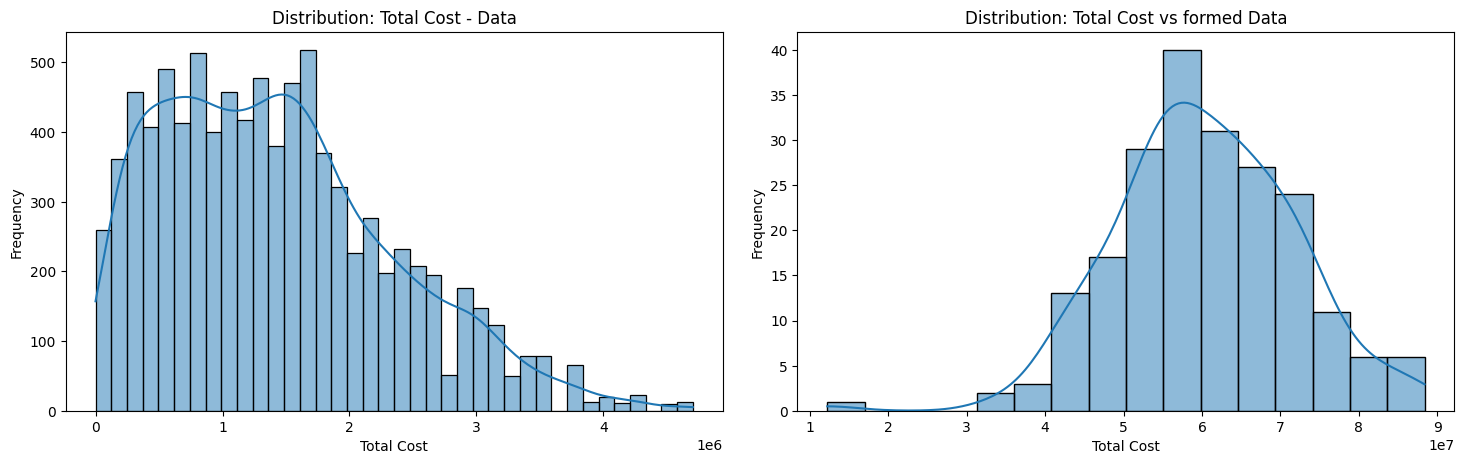

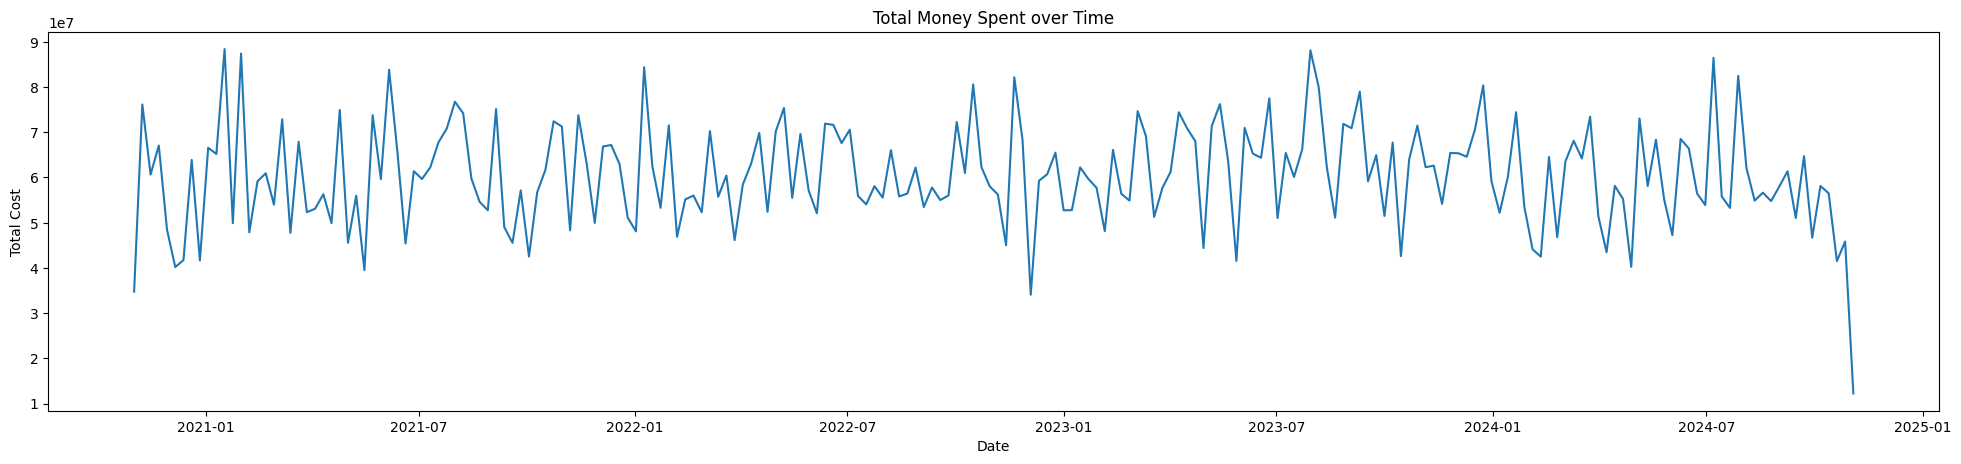

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(merged_data_2['Total_Cost'], kde=True)
plt.title('Distribution: Total Cost - Data')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df_datevtotal['Total_Cost'], kde=True)
plt.title('Distribution: Total Cost vs formed Data')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')

plt.tight_layout(pad=2)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))

sns.lineplot(x=df_datevtotal.index, y='Total_Cost', data = df_datevtotal)
plt.title('Total Money Spent over Time')
plt.xlabel('Date')
plt.ylabel('Total Cost')

plt.tight_layout(pad=2)
plt.show()

Data Exploration

In [10]:
#Compares the the

def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window=12).mean()
    MSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [11]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1] # Used to identify if Differencing (I) is needed or not
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax) #Used to identify the MA terms
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax) #Used to identify the AR terms
        plt.tight_layout()

<Axes: >

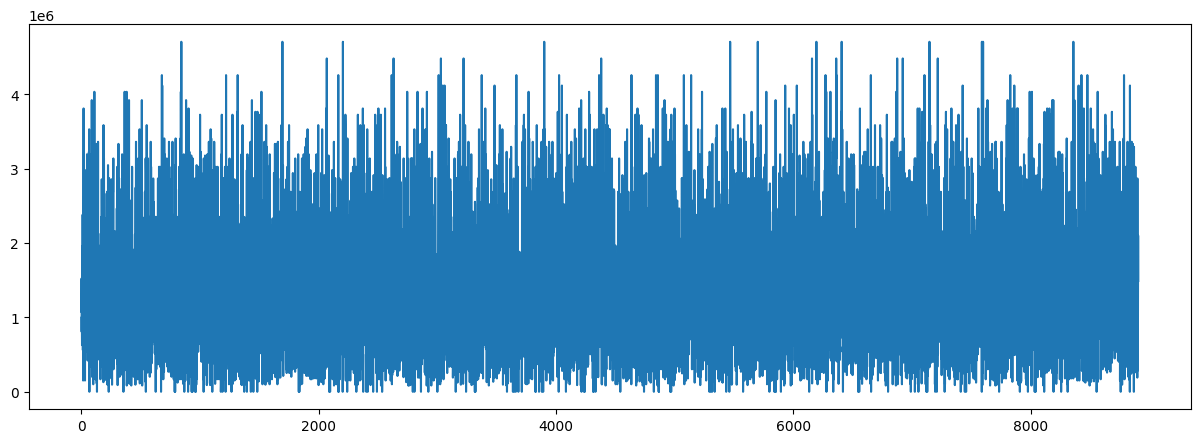

In [ ]:
plt.figure(figsize= (15, 5))
merged_data_2['Total_Cost'].plot()
#Setu

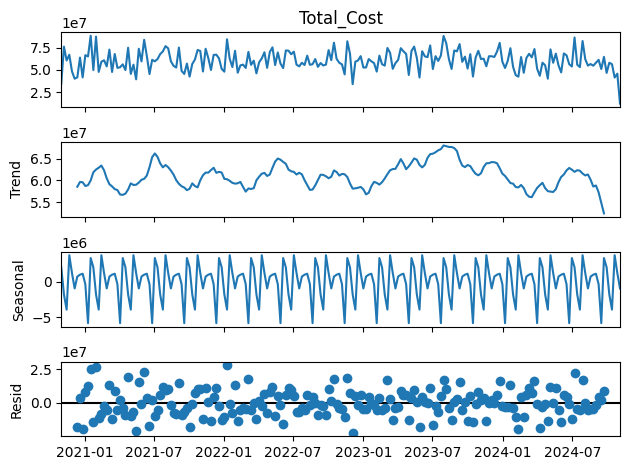

In [8]:
comp = sm.tsa.seasonal_decompose(df_datevtotal['Total_Cost'], period=12, model='additive').plot()
plt.show()

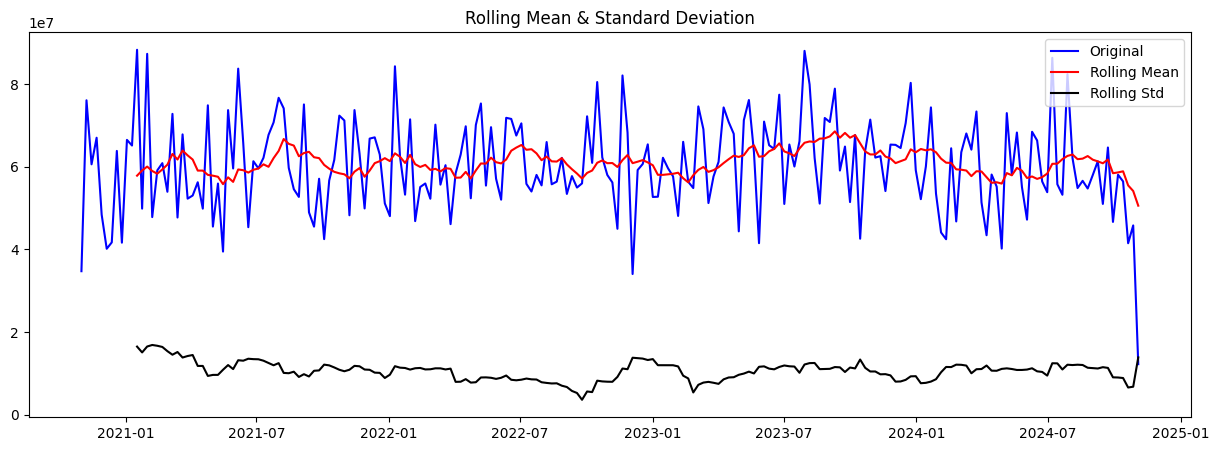

Results of Dickey-Fuller Test:
Test Statistic                -1.408176e+01
p-value                        2.820637e-26
#Lags Used                     0.000000e+00
Number of Observations Used    2.090000e+02
Critical Value (1%)           -3.462032e+00
Critical Value (5%)           -2.875471e+00
Critical Value (10%)          -2.574195e+00
dtype: float64


In [ ]:
test_stationarity(df_datevtotal)

The Dickey-Fuller Test provides insight to see if time series is stationary (Statistical properties does NOT change over time) or non-stationary. This is crucial to look at to see if any other processing methods are needed before proceeding to modeling (ARIMA modeling requires the data to be stationary)

Test Interpretation

1. Test Statistics vs Critical Values
  The Test Statistics is SIGNIFICANTLY LOWER below all critical values:

2. p-value
  An extremely low p-value (lower than the common significance levels = 0.05) indicates that the a strong likelihood of null hypothesis being rejected, suggesting that the time series is stationary

3. Lag Used
  No lags detected

4. Null Hypothesis (H0): Time series is non-stationary

5. Alternative Hypothesis (H1): Time series is stationary

6. If test statistics is less than critical value, or p-value is less than significance level, we will reject the null hypothesis.

7. Due to the values given, the time-series is stationary, meaning that the statistical properties of the time series is constant over time.  






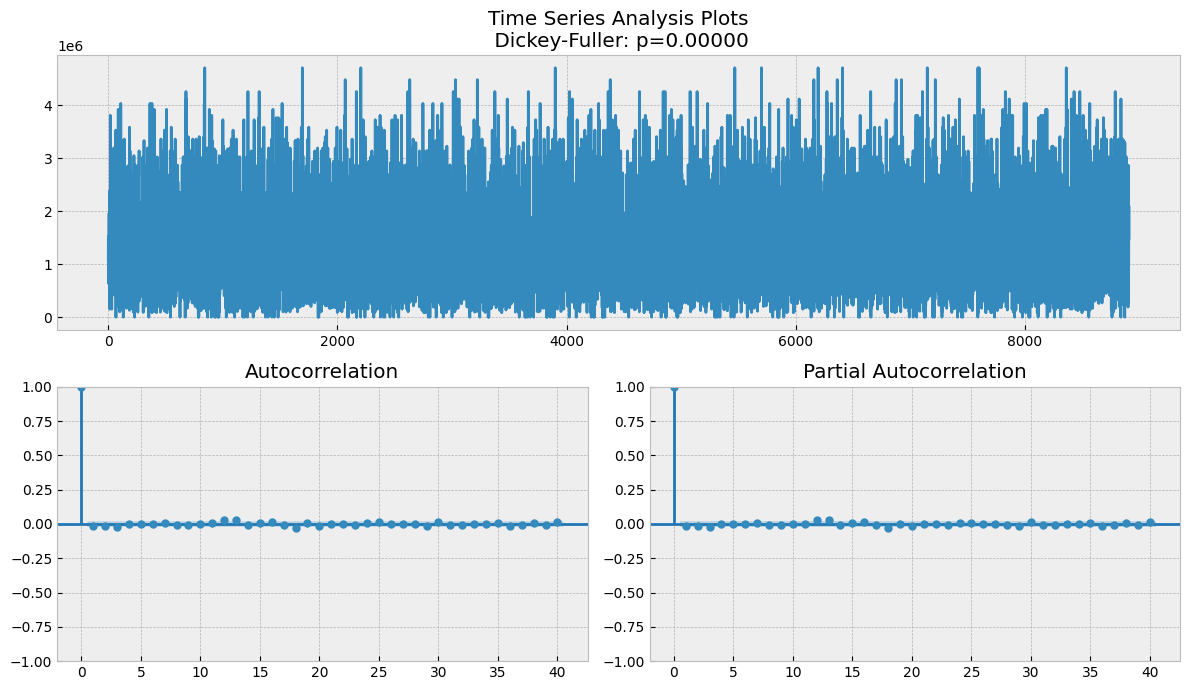

In [14]:
tsplot(merged_data_2['Total_Cost'])

In [16]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(merged_data_2['Total_Cost'], order=(2,0,4))
arima_fit = model.fit()
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Total_Cost   No. Observations:                 8909
Model:                 ARIMA(2, 0, 4)   Log Likelihood             -134939.498
Date:                Tue, 11 Mar 2025   AIC                         269894.996
Time:                        02:57:01   BIC                         269951.755
Sample:                             0   HQIC                        269914.320
                               - 8909                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.424e+06   9298.366    153.097      0.000    1.41e+06    1.44e+06
ar.L1          0.1875      4.873      0.038      0.969      -9.363       9.738
ar.L2         -0.1189      0.721     -0.165      0.8

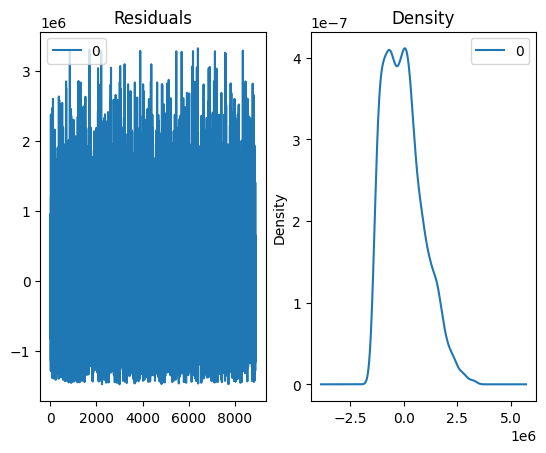

In [17]:
#Plot residual errors
residuals = pd.DataFrame(arima_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

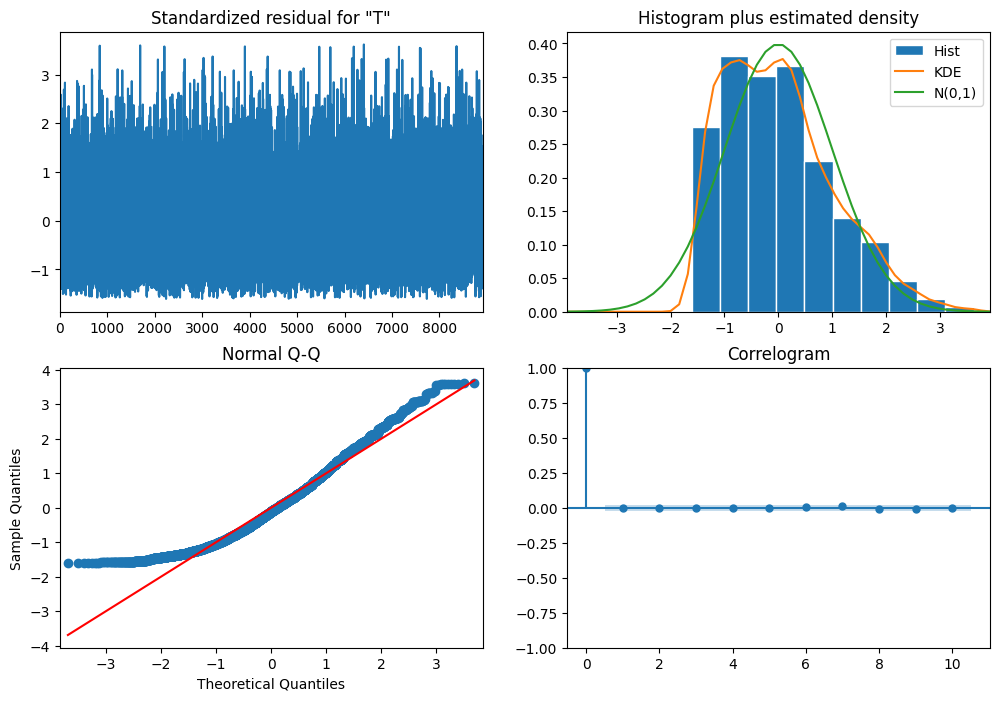

In [18]:
arima_fit.plot_diagnostics(figsize=(12,8))
plt.show()

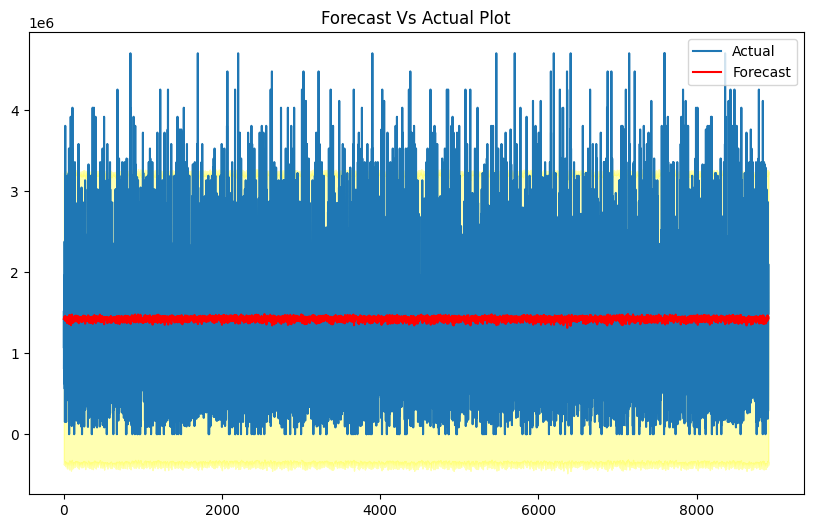

In [23]:
#Forecast and PLot
forecast = arima_fit.get_prediction(dymanic=False)
forecast_index = merged_data_2.index
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10,6))
plt.plot(merged_data_2['Total_Cost'], label='Actual')

plt.plot(forecast.predicted_mean, color='red', label='Forecast')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:,1], color='yellow', alpha=0.3)
plt.title('Forecast Vs Actual Plot')
plt.legend()
plt.show()